# Milestone 2 - continued #
## Task 3 ##

In [5]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

from scripts import project_functions

In [6]:
df = project_functions.load_process_data("../../data/data_raw/part_data.csv")
df

,gender,grade_level,hands,num_resource,announce,discuss,absent,final_grade,interaction_sum
0,M,lowerlevel,15,16,2,20,Under-7,M,53
1,M,lowerlevel,20,20,3,25,Under-7,M,68
2,M,lowerlevel,10,7,0,30,Above-7,L,47
3,M,lowerlevel,30,25,5,35,Above-7,L,95
4,M,lowerlevel,40,50,12,50,Above-7,M,152
...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,5,4,5,8,Above-7,L,22
476,F,MiddleSchool,50,77,14,28,Under-7,M,169
477,F,MiddleSchool,55,74,25,29,Under-7,M,183
478,F,MiddleSchool,30,17,14,57,Above-7,L,118


## Task 4 - EFA ##

In [7]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Basic Data Frame Characteristics ###

We have 480 rows of data on 9 different characteristics. There are no missing values for our numeric variables

**Numeric Variables**

Means, minimum, and maximum values for each numeric variable can be obtained from the table below

In [11]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,hands,num_resource,announce,discuss,interaction_sum
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,182.775000
std,30.779223,33.080007,26.611244,27.637735,93.056583
min,0.000000,0.000000,0.000000,1.000000,4.000000
25%,15.750000,20.000000,14.000000,20.000000,104.000000
50%,50.000000,65.000000,33.000000,39.000000,184.000000
75%,75.000000,84.000000,58.000000,70.000000,257.250000
max,100.000000,99.000000,98.000000,99.000000,368.000000


**Categorical variables:**

There are two 'gender' options (M = male, F = female) 

There are three different options for 'grade_level' (lower, middle, or high school. 

There are two options for 'absent' (absent > 7 days = 'Above-7', absent < 7 = 'Under-7') 

There are three options for 'final_grade' (low = L, medium = M, high = H)

In [16]:
df.gender.unique()

array(['M', 'F'], dtype=object)

In [17]:
df.grade_level.unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

In [18]:
df.absent.unique()

array(['Under-7', 'Above-7'], dtype=object)

In [19]:
df.final_grade.unique()

array(['M', 'L', 'H'], dtype=object)

**Correlation Matrix & Scatter Plots** 

As expected, the sum of total interactions within the classroom is highly correlated with each of the singular interaction variables (r > .83). They are also all positively correlated meaning an increase in one interaction is associated with an increase in another type of classroom interaction.

It is pertinent to note that discussion participation is not as highly correlated with the total interaction score. In general, the number of times a student participated in the class has a low correlation with other variables.

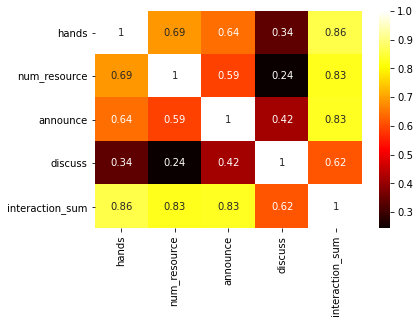

In [30]:
cor = df.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, 
            cmap='hot')

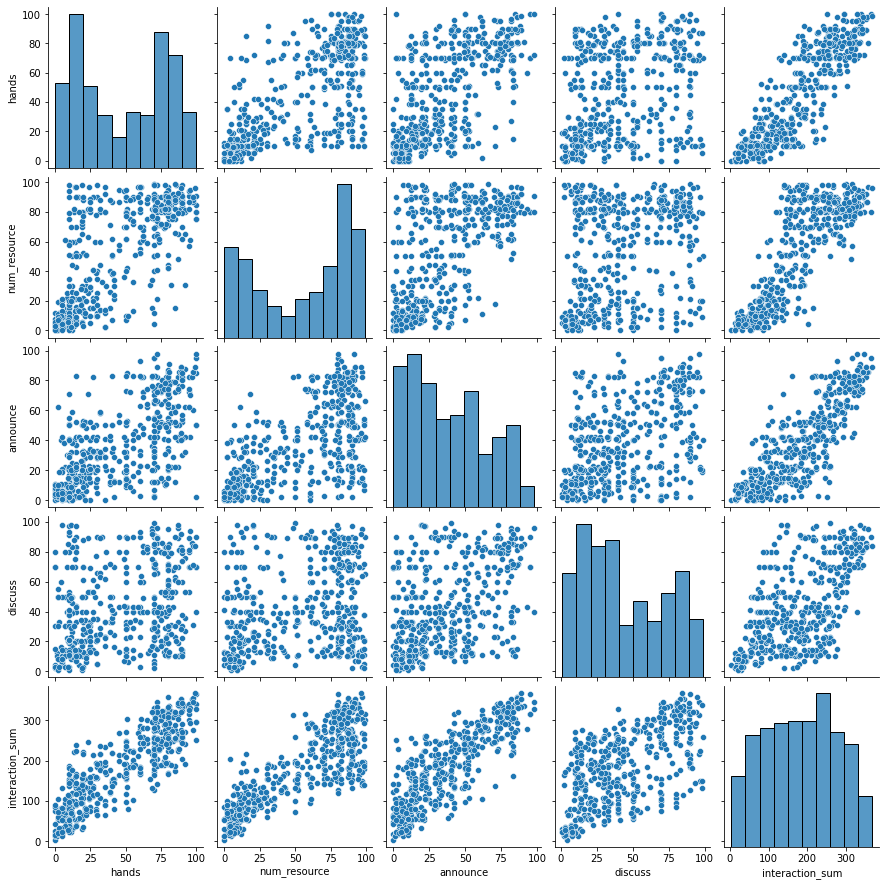

In [32]:
sns.pairplot(df)

**Gender Box Plot**

It appears that on average, females have a higher total number of interactions in the classroom. It is also interesting to note that the middle 50% of the females group between 150-250 interactions while males have a much greater spread (ie: there is more variability in the amount of times a male will interact in a classroom. 

Text(0, 0.5, 'Total Number of Classroom Interactions')

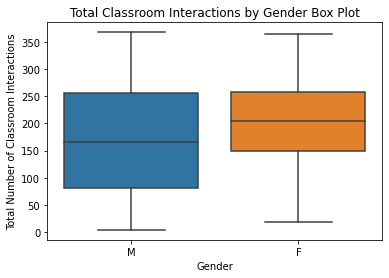

In [42]:
sns.boxplot(x='gender', y='interaction_sum', data = df)
plt.title("Total Classroom Interactions by Gender Box Plot")
plt.xlabel('Gender')
plt.ylabel('Total Number of Classroom Interactions')

**Grade Level Box Plot**

It appears that middle school children have the highest number of total classroom interactions in comparison to lower level and high school students. 

Text(0, 0.5, 'Total Number of Classroom Interactions')

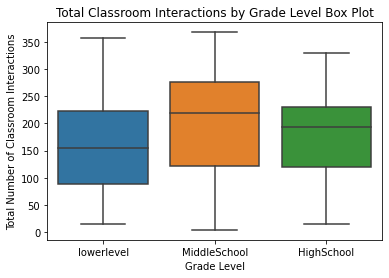

In [43]:
sns.boxplot(x='grade_level', y='interaction_sum', data = df)
plt.title("Total Classroom Interactions by Grade Level Box Plot")
plt.xlabel('Grade Level')
plt.ylabel('Total Number of Classroom Interactions')

**Days Absent Box Plot**

It is quite apparent that students that are absent less than 7 days have a higher number of total interactions than students that are absent for more than 7 days. This makes sense as you have to attend class in order to participate. There could be other confounding variables that make students attend school fewer days and also participate less in the classroom. 

Text(0, 0.5, 'Total Number of Classroom Interactions')

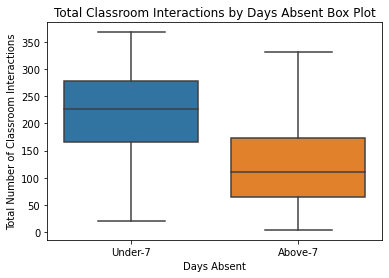

In [44]:
sns.boxplot(x='absent', y='interaction_sum', data = df)
plt.title("Total Classroom Interactions by Days Absent Box Plot")
plt.xlabel('Days Absent')
plt.ylabel('Total Number of Classroom Interactions')

**Final Grades Box Plot**

You can see that those with the highest final grades had the highest average total classroom interactions. Those with the lowest final grades had the fewest total classroom interactions on average.  

Text(0, 0.5, 'Total Number of Classroom Interactions')

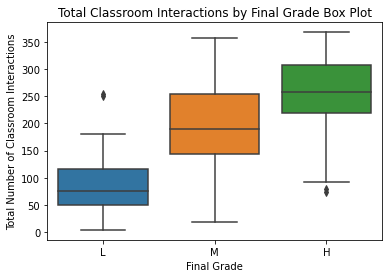

In [46]:
sns.boxplot(x='final_grade', y='interaction_sum', order = ['L', 'M', 'H'], data = df)
plt.title("Total Classroom Interactions by Final Grade Box Plot")
plt.xlabel('Final Grade')
plt.ylabel('Total Number of Classroom Interactions')